In [3]:
import matplotlib.pyplot as plt 
from sklearn import linear_model as lm
from sklearn.datasets import load_iris # I found that sklearn have iris dataset built in
import numpy as np 
import pandas as pd
from matplotlib.colors import ListedColormap

In [4]:
iris = load_iris() # loads the iris dataset,its already being sorted in the form that can be easily processed by sklearn function

# data is where the features of the iris are stored, I will take the last 100 data, which represent all samples of versicolor and viginica
# iris.target represent the species of the given data, I will use only the last 100 as well,those data would be use for validation 

X = iris.data[50:,:2]
# It is indeed the dataset we want to look for
print(X)
Y = iris.target[50:]
# for convienience, I would represent versicolor as -1, virinica as 1
for i in range(50):
    Y[i] = -1
    Y[i+50] = 1
print(Y)

# Some code trying to manipulate the data [:,:2] returns the first two features in the data, where (x,y) can access them at same time.
#for (x,y)in X[:,:2]:
#    print(x,y)
# Get first and 3rd column
#iris.data[:100,(1,3)]
print(iris.feature_names[:])
#print(X)

[[7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]
 [6.1 3. ]
 [5.8 2.6]
 [5.  2.3]
 [5.6 2.7]
 [5.7 3. ]
 [5.7 2.9]
 [6.2 2.9]
 [5.1 2.5]
 [5.7 2.8]
 [6.3 3.3]
 [5.8 2.7]
 [7.1 3. ]
 [6.3 2.9]
 [6.5 3. ]
 [7.6 3. ]
 [4.9 2.5]
 [7.3 2.9]
 [6.7 2.5]
 [7.2 3.6]
 [6.5 3.2]
 [6.4 2.7]
 [6.8 3. ]
 [5.7 2.5]
 [5.8 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [7.7 3.8]
 [7.7 2.6]
 [6.  2.2]
 [6.9 3.2]
 [5.6 2.8]
 [7.7 2.8]
 [6.3 2.7]
 [6.7 3.3]
 [7.2 3.2]
 [6.2 2.8]
 [6.1 3. ]
 [6.4 2.8]
 [7.2 3. ]
 [7.4 2.8]
 [7.9 3.8]
 [6.4 2.8]
 [6.3 2.8]
 [6.1 2.6]
 [7.7 3. ]
 [6.3 3.4]
 [6.4 3.1]
 [6.  3. ]
 [6.9 3.1]
 [6.7 3.1]

In [5]:
class Adaline(object):
    
    """eta = learning rate, 
       epoch = maximum epoch, 
    """
        # Note that the learning rate is critical when using the gradient descent method,
        # a learning rate that is too large would make us go
        # I am using the one of best_eta provided in professor's code as defeault.
    def __init__(self,eta=0.0003,epoch=20):
        self.eta = eta
        self.epoch = epoch
        self.cost =[]

    def train(self,dataset,target):
        # Initialize weight array all 0, weight[0] is the bias(threshold)
        # The length of the weight array is equal to the number of features + 1(for the bias)
        self.dataset = dataset
        self.target = target
        features = len(dataset[0])
        self.weights = np.zeros((features+1))
        # The cost used to measure the error of our Adaline, smalller cost means better result
        self.cost_ = []
        
        # Gradient descend method that update the weights for all samples in one batch
        # Where the unit step method we need to update the weight after each sample
        # This is done by going in the opposite direction of the gradient that minimize the cost function.
        
        # Step1: calculate the net_input(z) for all samples
        # Step2: calulate the errors using (target - net_input) formula
        # Step3: update the weights using the gradient descend methods, which is adding the product of sum of all errors
        # times the learning rate and the current input(feature) to the old weights
        # which is : new_weight = old_weight + sum(errors) * eta * x[i]
        
        for _ in range(self.epoch):
            z = self.net_input(self.dataset)
            err = (self.target - z)
            self.weights[1:] += self.eta * self.dataset.transpose().dot(err)
            self.weights[0] += self.eta * err.sum()
            cost = (err**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
                  
    def activation_function(self,current_data):
        # A "fake" function which returns the net_input of current data
        return self.net_input(current_data)
    
    def net_input(self,current_data):
        #Return the dot product of current_data and weight
        return np.dot(current_data,self.weights[1:]) + self.weights[0]
    
    def predict(self,test_data):
        # If data_set net_input >=0, we classify it as versicolor, otherwise setosa
        return np.where(self.activation_function(test_data) >= 0.0, 1, -1)
    
    def accuracy(self, x, y):
        # Return the accuracy of the model by comparing the actual target value and our predict value
        return (1.0 - abs(y - self.predict(x)).sum() / (2.0 * y.size))
            

In [6]:
# This class help us visualize the dataset we are using, although it only supports visualizing two features
class Plot_data(object):
    def __init__(self,label1 = 'Versicolor', label2 = 'Virginica',title = 'Data Visulization'):
        self.label1 = label1
        self.label2 = label2
        self.title = title
    def plot(self,dataset,*args):
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        plt.figure(figsize=(7,5))
        plt.scatter(dataset[:,0], dataset[:,1], c=Y, cmap=cm_bright)
        plt.scatter(None, None, color = 'r', label=self.label1)
        plt.scatter(None, None, color = 'b', label=self.label2)
        plt.legend()
        plt.title(self.title)
        plt.xlabel(args[0])
        plt.ylabel(args[1])
        plt.show()

In [7]:
class Plot(object):
    def __init__(self):
        pass
        # This plot function is from Professor Erik K. Grimmelmann
    def plot(self,data,title='title',xlabel='xlabel',ylabel='ylabel'):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,6))
        ax.semilogy(range(1, len(data) + 1), data)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title, fontsize ='medium')
        plt.show()
    

In [8]:
cost = ['Epoch','Sum-squared-error']
accuracy = ['Epoch','%accuracy']
    

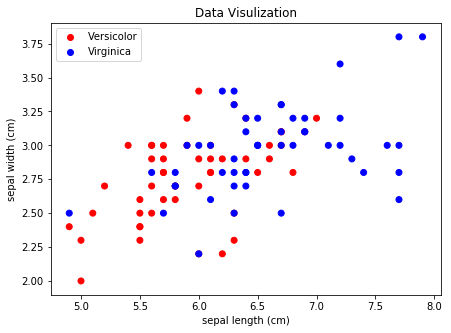

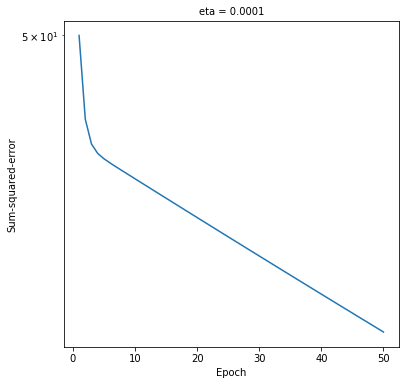

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.62
0.6799999999999999


In [9]:
# test 
ada = Adaline(epoch=50,eta= 0.0001)
ada.train(X,Y)
data_plot = Plot_data()
plot_ = Plot()
data_plot.plot(X,*iris.feature_names[:2])
plot_.plot(ada.cost_,'eta = 0.0001',*cost)


for i in [0,5,10,15,20,30,50,100,1024,2048]:
    ada = Adaline(epoch=i,eta= 0.0001)
    ada.train(X,Y)
    print(ada.accuracy(X,Y))


In [10]:
# My definition of best eta is the giving the least sum_error after a fixed number of iters
# Because of finding the absolute best_eta is time consuming, I just used 6 possible etas and use the best in them
class Find_best_eta(object):
    def __init__(self,epoch = 50):
        self.epoch_ = epoch
        self.etas = [0.01,0.001,0.0005,0.0003,0.0001,0.00001]
        self.result = []
        
    def best_eta(self,dataset,target):
        self.errors = []
        for eta_ in self.etas:
            # I found that bad eta with large number of epochs easily overflow the system, so maximum = 50
            if self.epoch_ >= 50:
                self.epoch_ = 50
            ada = Adaline(eta=eta_,epoch = self.epoch_).train(dataset,target)
            self.errors.append(ada.cost_[-1])

        return self.etas[self.errors.index(min(self.errors))]
    
    def print_result(self):
        self.result = [list(pair) for pair in zip(self.etas,self.errors)]
        print("At epoch {} the error correspond to each of the candidate eta ".format(self.epoch_))
        for (a,b) in self.result:
            print("eta:{} error: {}".format(a,b))
        
        

In [11]:
# Test the print function
best = Find_best_eta()
best_eta_ = best.best_eta(X,Y)
best.print_result()
print(best_eta_)

At epoch 50 the error correspond to each of the candidate eta 
eta:0.01 error: 5.658298867234944e+163
eta:0.001 error: 7.930297207372937e+56
eta:0.0005 error: 574674170385246.0
eta:0.0003 error: 49.310026870235546
eta:0.0001 error: 49.68526583393565
eta:1e-05 error: 49.86548601217853
0.0003


In [12]:
# A test class that automatically finds the best_eta and train the adaline use it, plot the sum-squared error and 
# record the accuracy and the final cost(the cost of the last epoch)
class Test(object):
    def __init__(self,dataset,target):
        self.dataset = dataset
        self.target = target
        self.accuracy_ = []
        self.cost = []
    def show_dataset(self,*features):
        data_plot.plot(self.dataset,*features)
    def train(self,epoch_ = 50):
        best = Find_best_eta(epoch = epoch_)
        best_eta_ = best.best_eta(self.dataset,self.target)
        print("Eta chosen: {}".format(best_eta_))
        ada = Adaline(eta=best_eta_,epoch = epoch_).train(self.dataset,self.target)
        plot_.plot(ada.cost_,"eta = {}".format(best_eta_),*cost)
        self.accuracy_.append(ada.accuracy(self.dataset,self.target))
        self.cost.append(ada.cost_[-1])
        return self

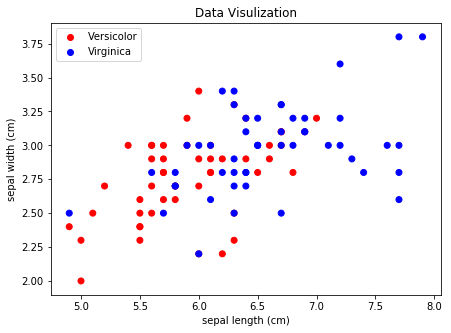

In [13]:
# Testing the 6 cases using two features at a time
X = iris.data[50:]
# note that SSW means sepal length and sepal width
SSW = X[:,:2]
test = Test(SSW,Y)
test.show_dataset(*iris.feature_names[:2])

    
epoch_selections = [5,10,20,30,50,100,200,500,1024,2048]

Eta chosen: 0.0003


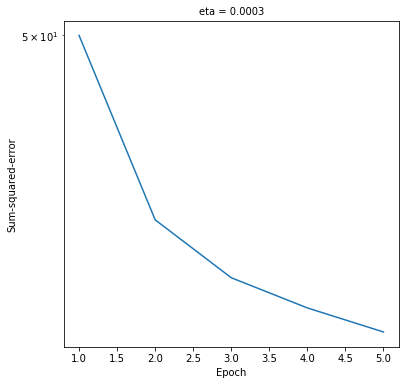

Eta chosen: 0.0003


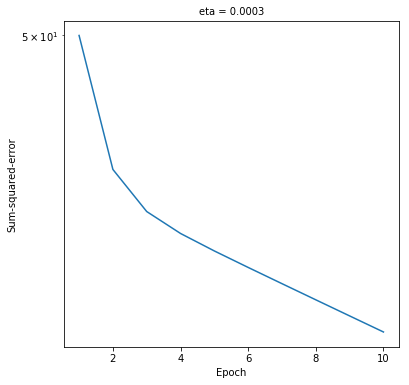

Eta chosen: 0.0003


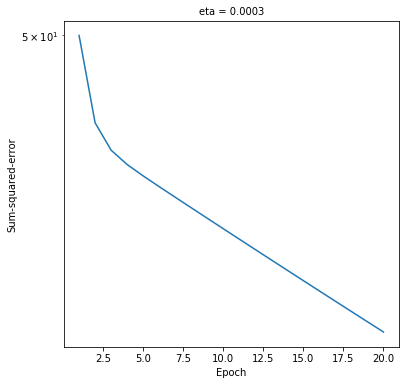

Eta chosen: 0.0003


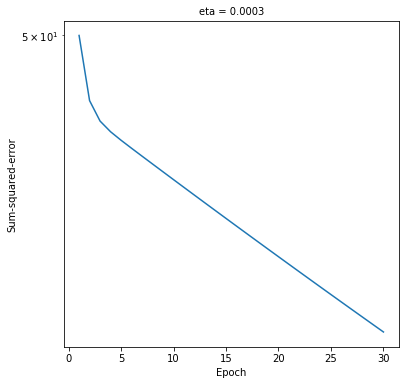

Eta chosen: 0.0003


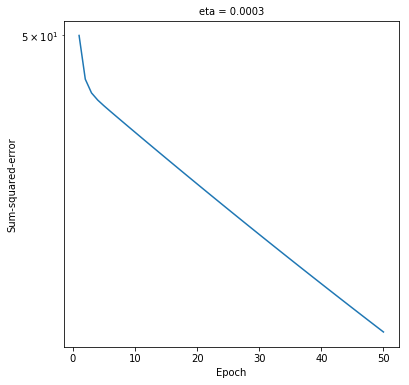

Eta chosen: 0.0003


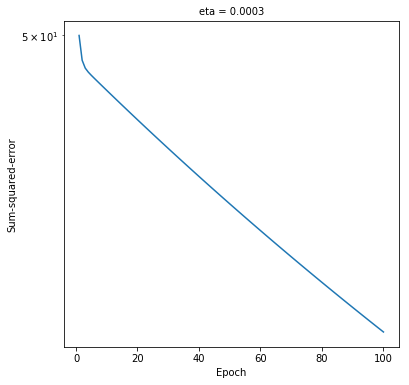

Eta chosen: 0.0003


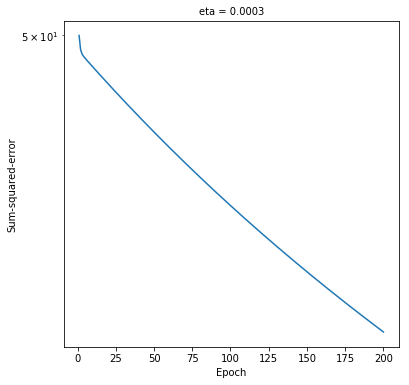

Eta chosen: 0.0003


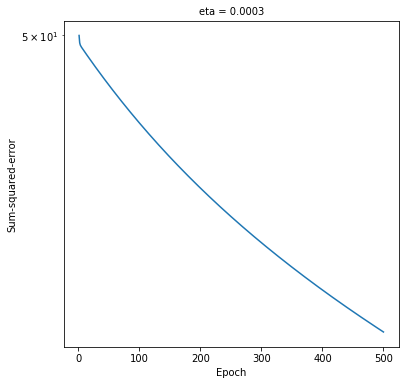

Eta chosen: 0.0003


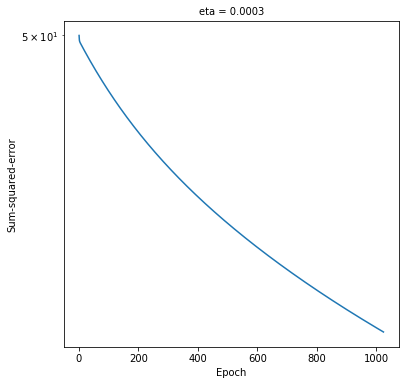

Eta chosen: 0.0003


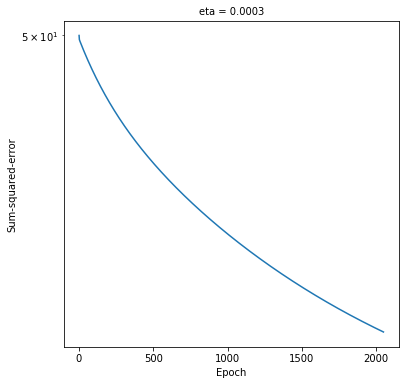

In [410]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [411]:
SSW_acc = ['%.2f' % elem for elem in test.accuracy_]
print("Case 1: Result of classfication using {} and {}:".format(*iris.feature_names[:2]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("\tTotal Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1
    

Case 1: Result of classfication using sepal length (cm) and sepal width (cm):
	Total Epochs: 5, Accuracy: 0.5, Final Cost: 49.83552831009425
	Total Epochs: 10, Accuracy: 0.5, Final Cost: 49.773831374362736
	Total Epochs: 20, Accuracy: 0.5, Final Cost: 49.65336376952225
	Total Epochs: 30, Accuracy: 0.5, Final Cost: 49.53598926625471
	Total Epochs: 50, Accuracy: 0.5, Final Cost: 49.310026870235546
	Total Epochs: 100, Accuracy: 0.5700000000000001, Final Cost: 48.79117273750551
	Total Epochs: 200, Accuracy: 0.6, Final Cost: 47.911778262040855
	Total Epochs: 500, Accuracy: 0.6799999999999999, Final Cost: 46.02431869478094
	Total Epochs: 1024, Accuracy: 0.7, Final Cost: 43.86861881583851
	Total Epochs: 2048, Accuracy: 0.73, Final Cost: 41.23922518156672


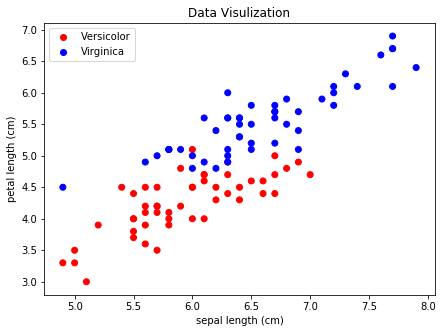

In [412]:
# Using sepel length and petal length
SP = X[:,(0,2)]
test = Test(SP,Y)
test.show_dataset(iris.feature_names[0],iris.feature_names[2])


Eta chosen: 0.0003


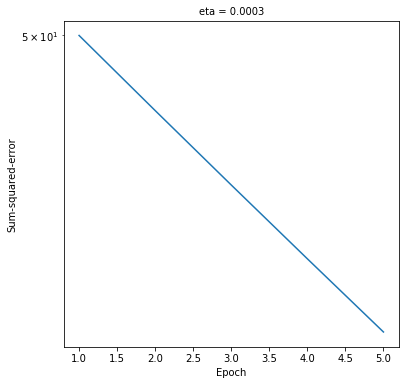

Eta chosen: 0.0003


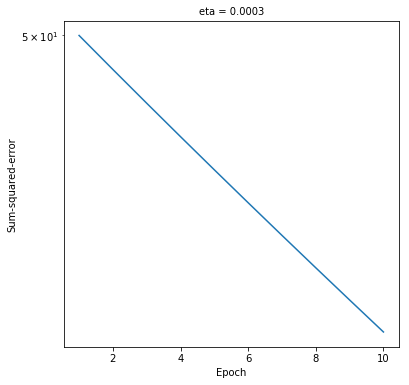

Eta chosen: 0.0003


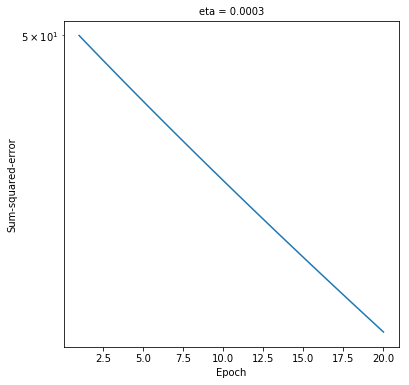

Eta chosen: 0.0003


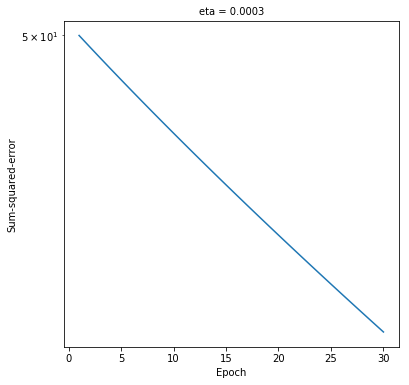

Eta chosen: 0.0003


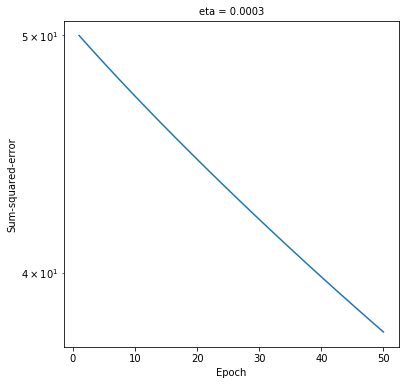

Eta chosen: 0.0003


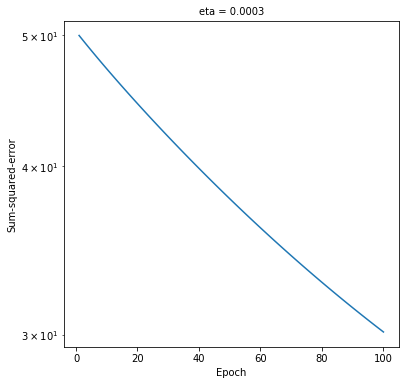

Eta chosen: 0.0003


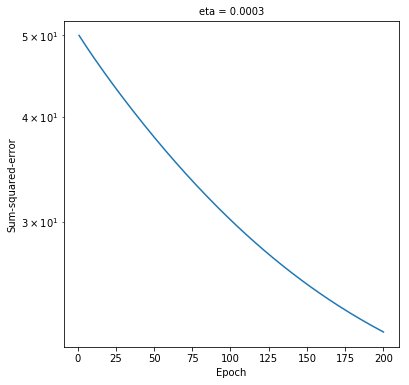

Eta chosen: 0.0003


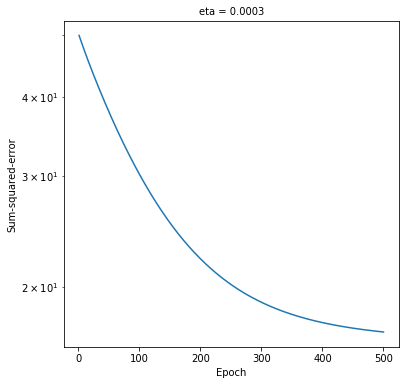

Eta chosen: 0.0003


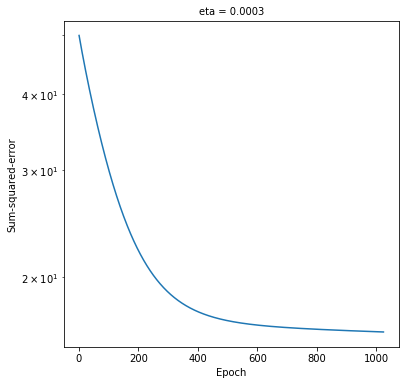

Eta chosen: 0.0003


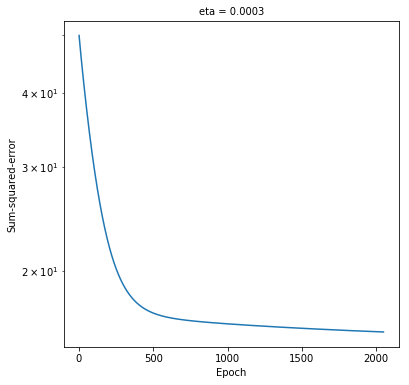

In [413]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [414]:
SP_acc = ['%.2f' % elem for elem in test.accuracy_]
print("Case 2: Result of classfication using {} and {}:".format(iris.feature_names[0],iris.feature_names[2]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1
    

Case 2: Result of classfication using sepal length (cm) and petal length (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 48.72645849142237
Total Epochs: 10, Accuracy: 0.8200000000000001, Final Cost: 47.23304501085146
Total Epochs: 20, Accuracy: 0.84, Final Cost: 44.509270566177385
Total Epochs: 30, Accuracy: 0.85, Final Cost: 42.06618850023703
Total Epochs: 50, Accuracy: 0.9, Final Cost: 37.84228266462702
Total Epochs: 100, Accuracy: 0.9, Final Cost: 30.14585759793141
Total Epochs: 200, Accuracy: 0.91, Final Cost: 22.161651101145768
Total Epochs: 500, Accuracy: 0.9, Final Cost: 16.97601099614403
Total Epochs: 1024, Accuracy: 0.92, Final Cost: 16.26370352976339
Total Epochs: 2048, Accuracy: 0.9299999999999999, Final Cost: 15.772941149276573


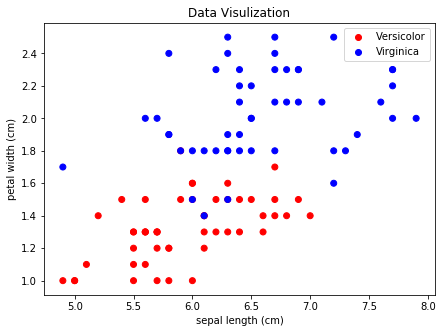

In [415]:
# Using Sepal Length and Pedal Width
SPW = X[:,(0,3)]
test = Test(SPW,Y)
test.show_dataset(iris.feature_names[0],iris.feature_names[3])

Eta chosen: 0.0003


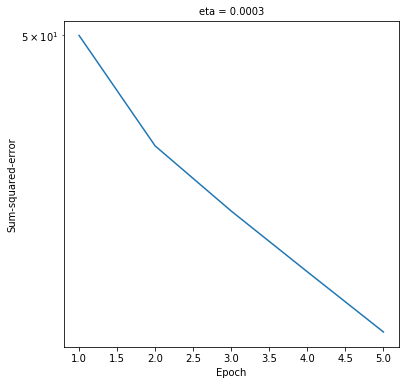

Eta chosen: 0.0003


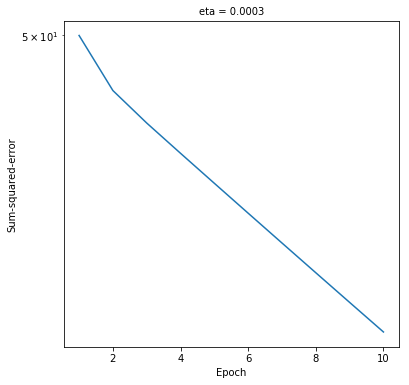

Eta chosen: 0.0003


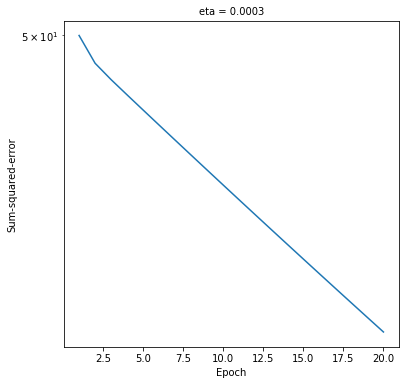

Eta chosen: 0.0003


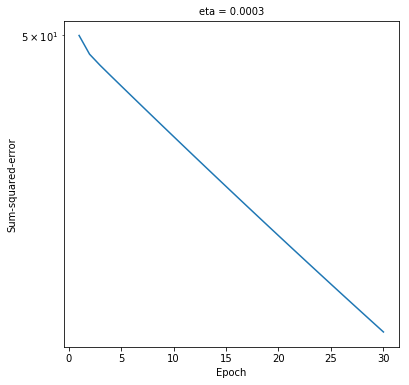

Eta chosen: 0.0003


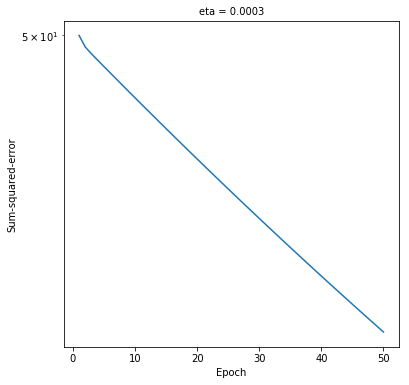

Eta chosen: 0.0003


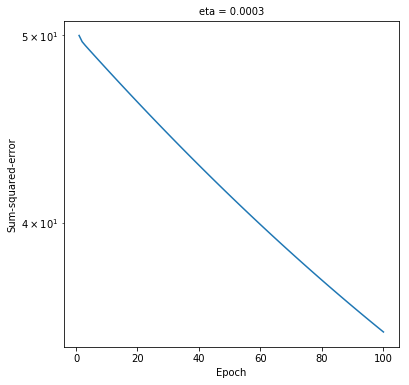

Eta chosen: 0.0003


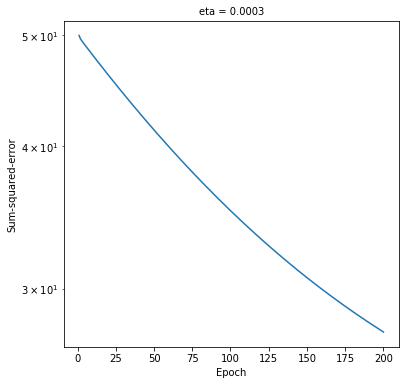

Eta chosen: 0.0003


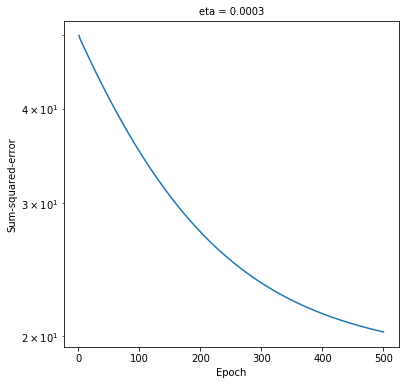

Eta chosen: 0.0003


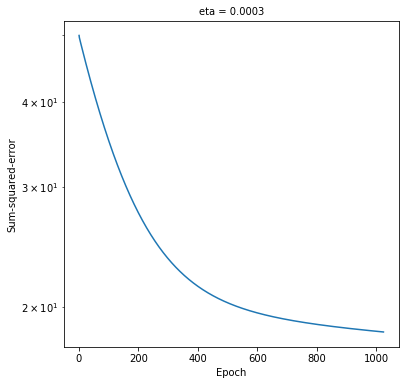

Eta chosen: 0.0003


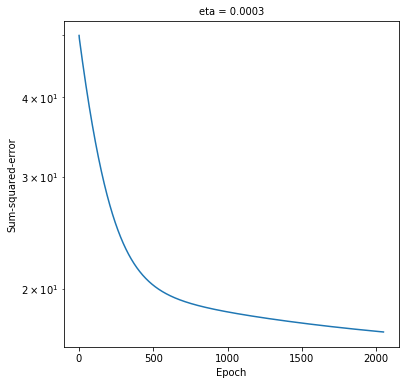

In [416]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [417]:
SPW_acc = ['%.2f' % elem for elem in test.accuracy_]
print("Case 3: Result of classfication using {} and {}:".format(iris.feature_names[0],iris.feature_names[3]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1
    

Case 3: Result of classfication using sepal length (cm) and petal width (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 49.01112152769128
Total Epochs: 10, Accuracy: 0.5, Final Cost: 48.03641110231163
Total Epochs: 20, Accuracy: 0.61, Final Cost: 46.183330164670735
Total Epochs: 30, Accuracy: 0.78, Final Cost: 44.451546320884724
Total Epochs: 50, Accuracy: 0.87, Final Cost: 41.32022265061507
Total Epochs: 100, Accuracy: 0.88, Final Cost: 35.112606485060304
Total Epochs: 200, Accuracy: 0.89, Final Cost: 27.488740504409986
Total Epochs: 500, Accuracy: 0.92, Final Cost: 20.27324765580316
Total Epochs: 1024, Accuracy: 0.9299999999999999, Final Cost: 18.367324787106373
Total Epochs: 2048, Accuracy: 0.94, Final Cost: 17.123509182669153


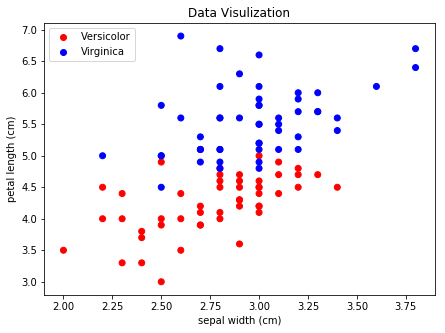

In [418]:
# Using Sepal Width and Pedal length
SWP = X[:,(1,2)]
test = Test(SWP,Y)
test.show_dataset(iris.feature_names[1],iris.feature_names[2])

Eta chosen: 0.0005


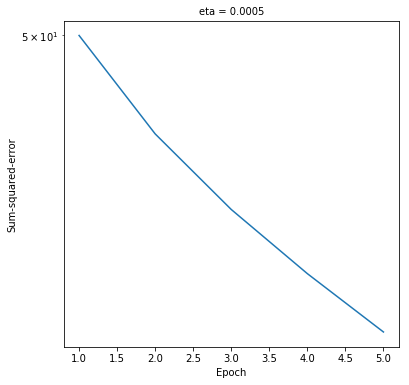

Eta chosen: 0.0005


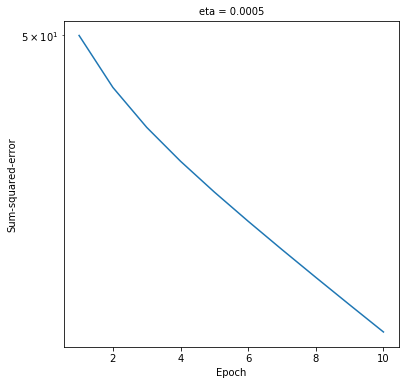

Eta chosen: 0.0005


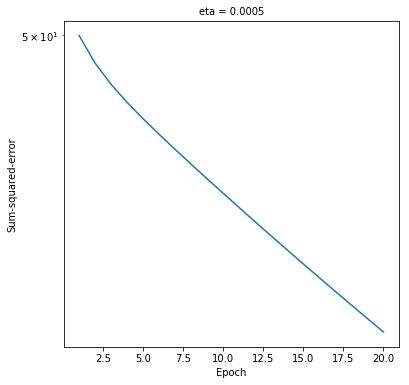

Eta chosen: 0.0005


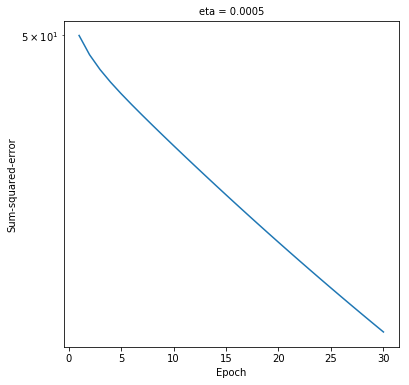

Eta chosen: 0.0005


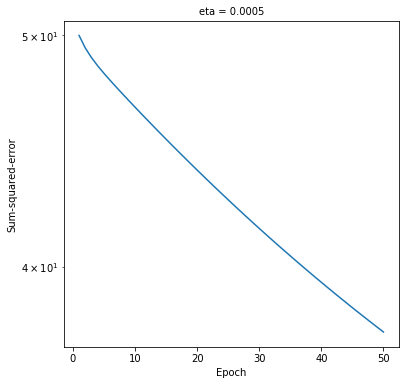

Eta chosen: 0.0005


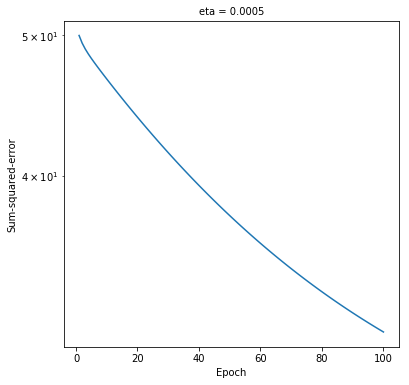

Eta chosen: 0.0005


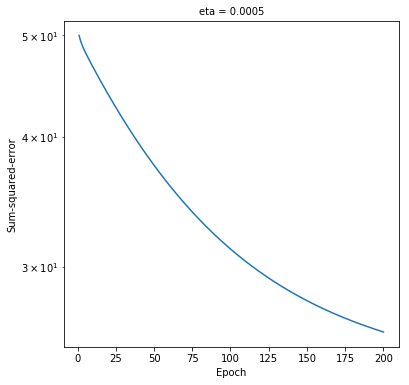

Eta chosen: 0.0005


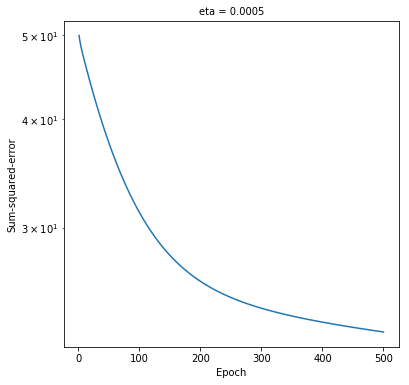

Eta chosen: 0.0005


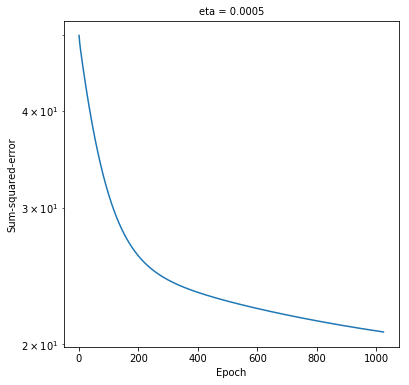

Eta chosen: 0.0005


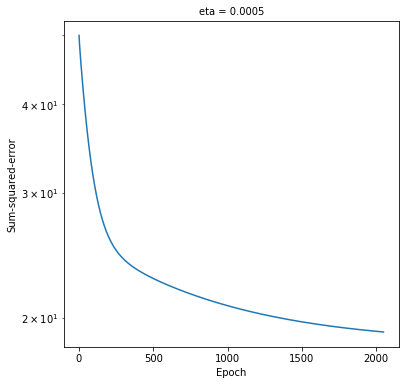

In [419]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [420]:
SWP_acc = ['%.2f' % elem for elem in test.accuracy_]
print("Case 4: Result of classfication using {} and {}:".format(iris.feature_names[1],iris.feature_names[2]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 4: Result of classfication using sepal width (cm) and petal length (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 48.20672975979867
Total Epochs: 10, Accuracy: 0.52, Final Cost: 46.65895449395094
Total Epochs: 20, Accuracy: 0.6699999999999999, Final Cost: 43.90955875245054
Total Epochs: 30, Accuracy: 0.8200000000000001, Final Cost: 41.50462971312836
Total Epochs: 50, Accuracy: 0.87, Final Cost: 37.554880204055046
Total Epochs: 100, Accuracy: 0.86, Final Cost: 31.21642857552049
Total Epochs: 200, Accuracy: 0.89, Final Cost: 25.99607603759441
Total Epochs: 500, Accuracy: 0.9, Final Cost: 22.72207296568473
Total Epochs: 1024, Accuracy: 0.89, Final Cost: 20.735070836923846
Total Epochs: 2048, Accuracy: 0.91, Final Cost: 19.101156759591856


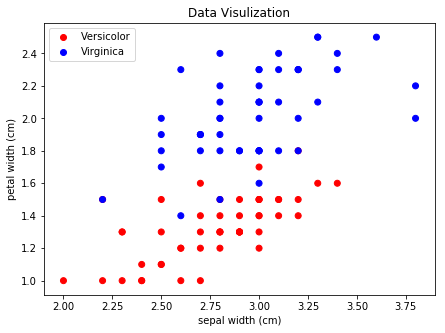

In [421]:
# Using Sepal Width and Pedal Width
SWPW = X[:,(1,3)]
test = Test(SWPW,Y)
test.show_dataset(iris.feature_names[1],iris.feature_names[3])

Eta chosen: 0.001


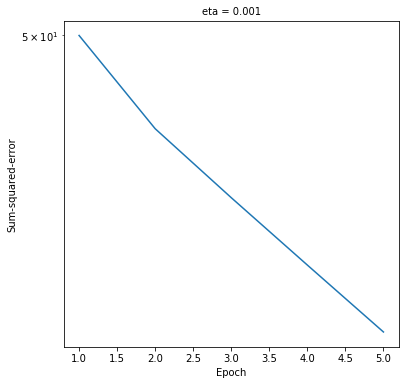

Eta chosen: 0.001


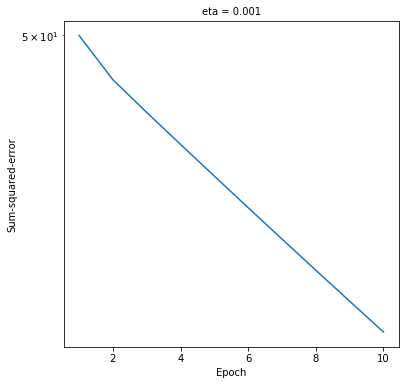

Eta chosen: 0.001


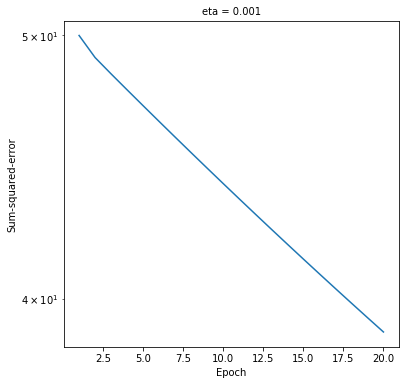

Eta chosen: 0.001


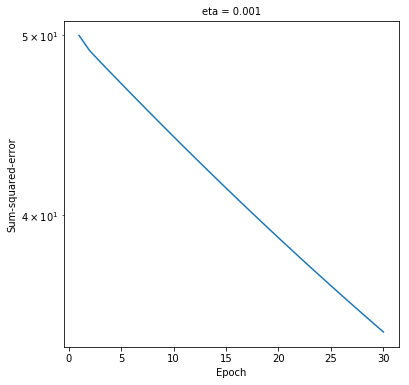

Eta chosen: 0.001


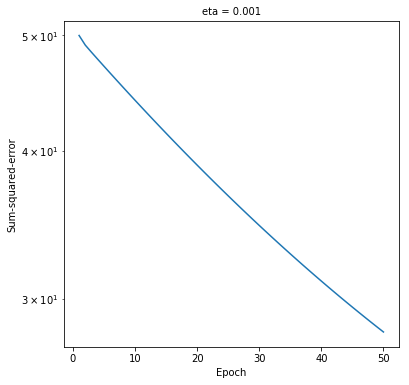

Eta chosen: 0.001


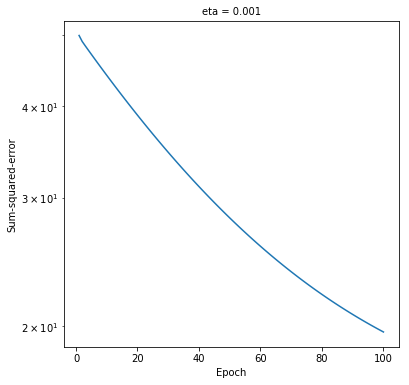

Eta chosen: 0.001


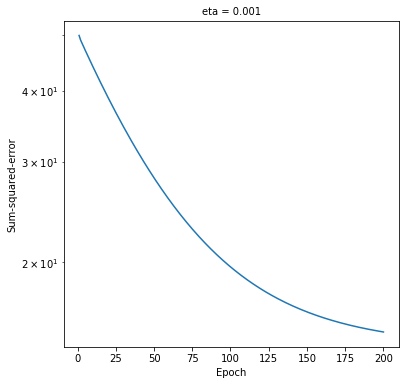

Eta chosen: 0.001


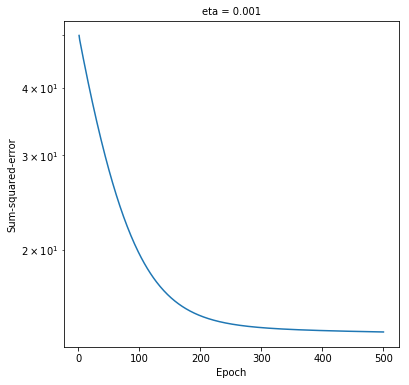

Eta chosen: 0.001


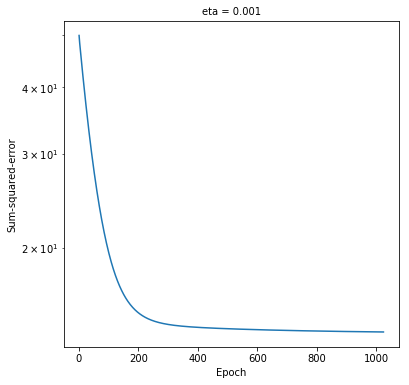

Eta chosen: 0.001


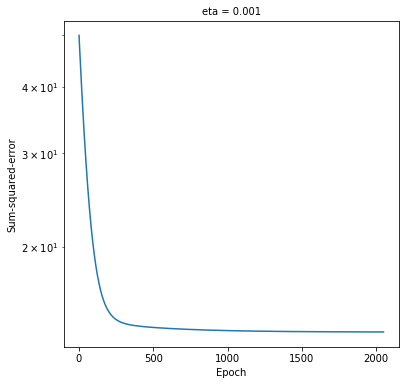

In [422]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [423]:
SWPW_acc = ['%.2f' % elem for elem in test.accuracy_]
print("Case 5: Result of classfication using {} and {}:".format(iris.feature_names[1],iris.feature_names[3]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 5: Result of classfication using sepal width (cm) and petal width (cm):
Total Epochs: 5, Accuracy: 0.52, Final Cost: 47.10884975399156
Total Epochs: 10, Accuracy: 0.8, Final Cost: 44.10017533026307
Total Epochs: 20, Accuracy: 0.91, Final Cost: 38.8891637514012
Total Epochs: 30, Accuracy: 0.92, Final Cost: 34.59405722023467
Total Epochs: 50, Accuracy: 0.91, Final Cost: 28.134308046268057
Total Epochs: 100, Accuracy: 0.92, Final Cost: 19.636493849337345
Total Epochs: 200, Accuracy: 0.92, Final Cost: 15.0969298124298
Total Epochs: 500, Accuracy: 0.94, Final Cost: 14.089562208120949
Total Epochs: 1024, Accuracy: 0.94, Final Cost: 13.893079428581235
Total Epochs: 2048, Accuracy: 0.95, Final Cost: 13.815578537942738


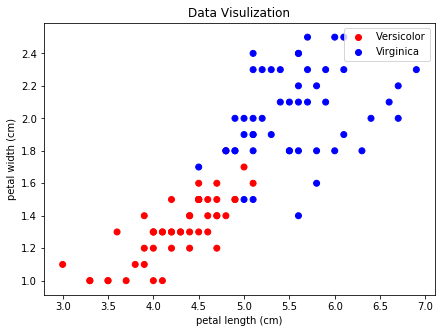

In [424]:
# Using Pedal Length and Pedal Width
PPW = X[:,(2,3)]
test = Test(PP,Y)
test.show_dataset(iris.feature_names[2],iris.feature_names[3])

Eta chosen: 0.0005


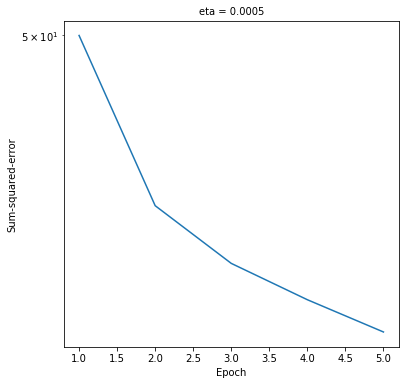

Eta chosen: 0.0005


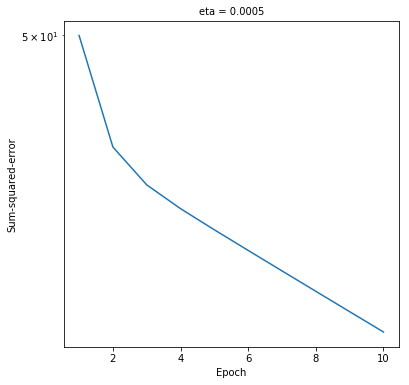

Eta chosen: 0.0005


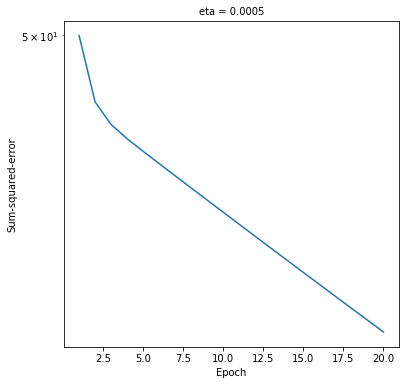

Eta chosen: 0.0005


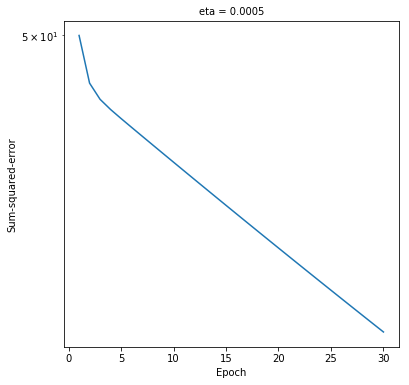

Eta chosen: 0.0005


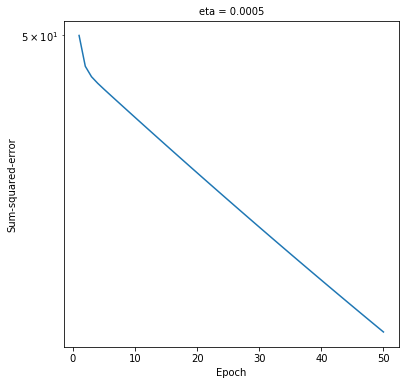

Eta chosen: 0.0005


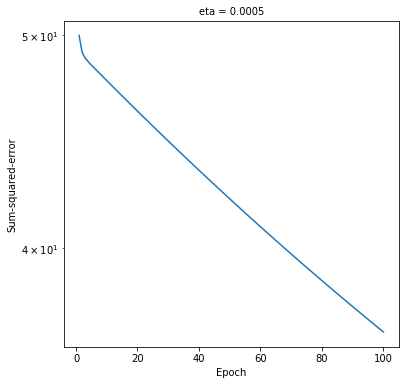

Eta chosen: 0.0005


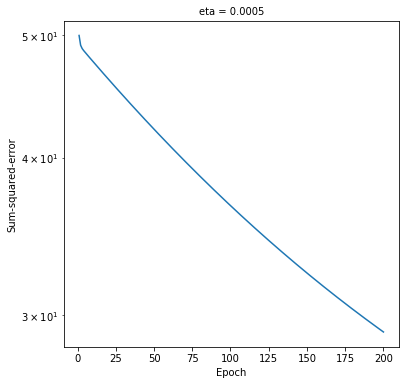

Eta chosen: 0.0005


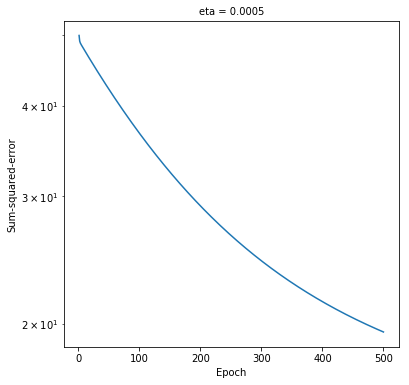

Eta chosen: 0.0005


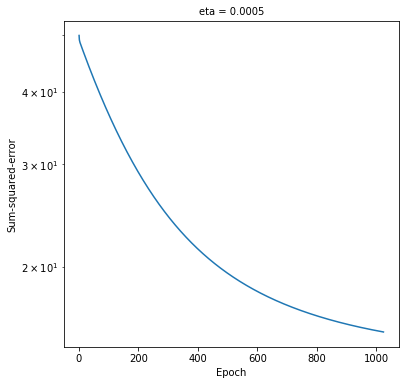

Eta chosen: 0.0005


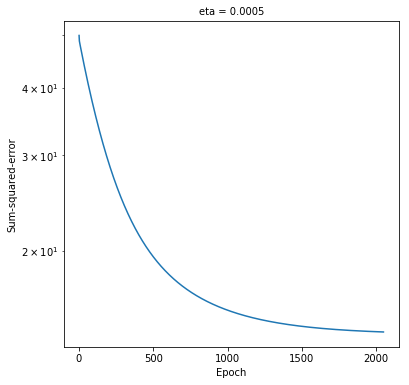

In [425]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [426]:
PPW_acc = ['%.2f' % elem for elem in test.accuracy_]
print("Case 6: Result of classfication using {} and {}:".format(iris.feature_names[2],iris.feature_names[3]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 6: Result of classfication using petal length (cm) and petal width (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 48.474279980080475
Total Epochs: 10, Accuracy: 0.5, Final Cost: 47.690962529717645
Total Epochs: 20, Accuracy: 0.5, Final Cost: 46.18809467222331
Total Epochs: 30, Accuracy: 0.5700000000000001, Final Cost: 44.76349791441672
Total Epochs: 50, Accuracy: 0.65, Final Cost: 42.13175838632305
Total Epochs: 100, Accuracy: 0.84, Final Cost: 36.64342292017834
Total Epochs: 200, Accuracy: 0.91, Final Cost: 29.09225990120205
Total Epochs: 500, Accuracy: 0.94, Final Cost: 19.49439057866341
Total Epochs: 1024, Accuracy: 0.94, Final Cost: 15.446702058720062
Total Epochs: 2048, Accuracy: 0.94, Final Cost: 14.155532137604956


In [450]:
# Cases using 3 features at a time
# Because graph 3 features need a 3d map, I would skip that part as they are not easy to understand
SSWP = X[:,(0,1,2)]
test = Test(SSWP,Y)


Eta chosen: 0.0001


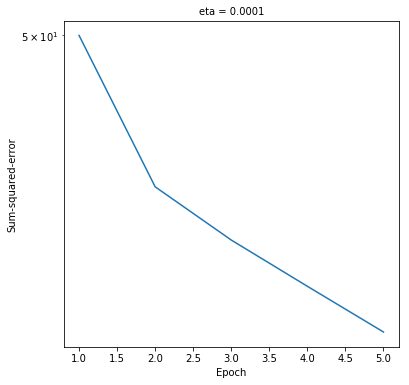

Eta chosen: 0.0001


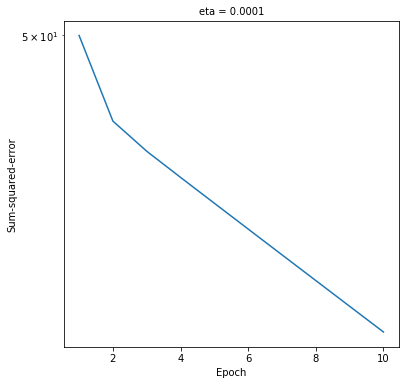

Eta chosen: 0.0001


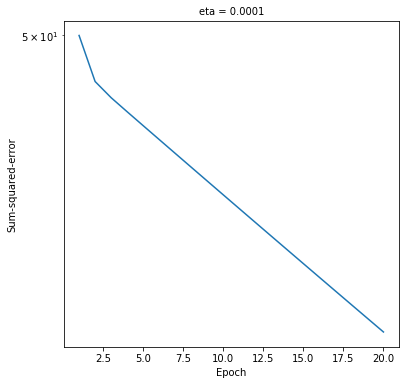

Eta chosen: 0.0001


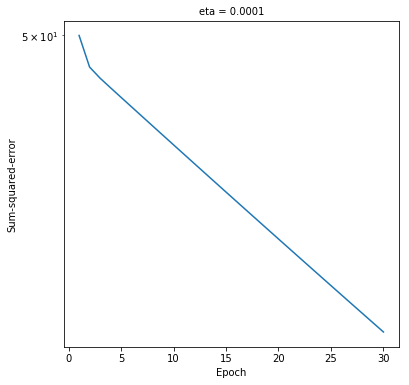

Eta chosen: 0.0001


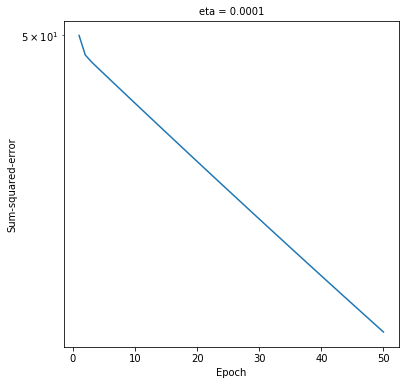

Eta chosen: 0.0001


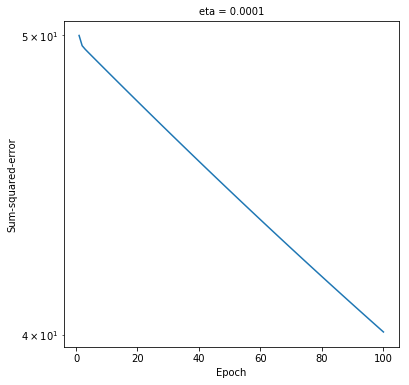

Eta chosen: 0.0001


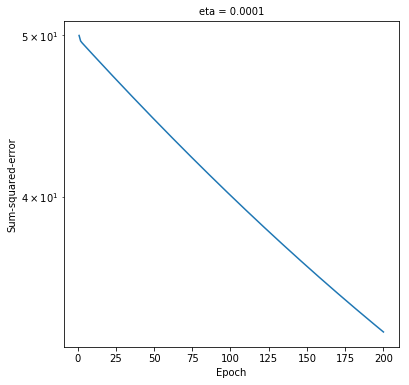

Eta chosen: 0.0001


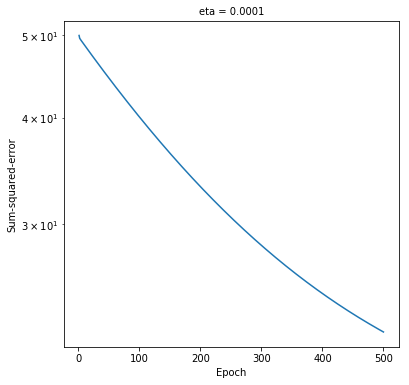

Eta chosen: 0.0001


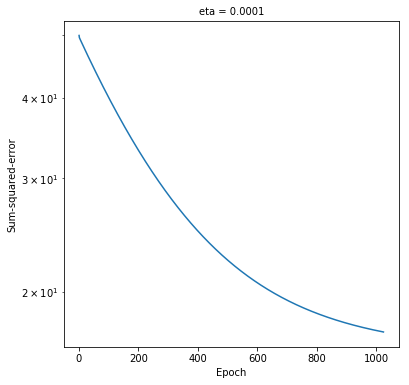

Eta chosen: 0.0001


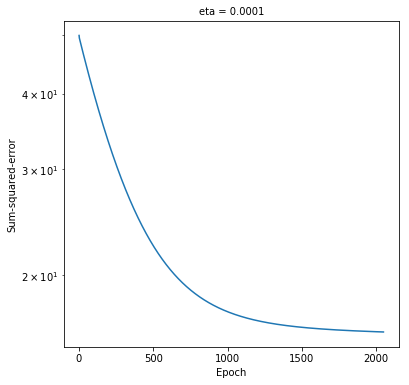

In [451]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)


In [452]:
SSWP_acc = ["%.2f" % elem for elem in test.accuracy_]
print("Case 7: Result of classfication using {} and {}and {}:".format(iris.feature_names[0],iris.feature_names[1],iris.feature_names[2]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 7: Result of classfication using sepal length (cm) and sepal width (cm)and petal length (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 49.258621647885036
Total Epochs: 10, Accuracy: 0.5, Final Cost: 48.69723086335117
Total Epochs: 20, Accuracy: 0.51, Final Cost: 47.603224815647664
Total Epochs: 30, Accuracy: 0.53, Final Cost: 46.54647207117296
Total Epochs: 50, Accuracy: 0.7, Final Cost: 44.53966945220122
Total Epochs: 100, Accuracy: 0.89, Final Cost: 40.090502804516944
Total Epochs: 200, Accuracy: 0.9, Final Cost: 33.19908451554348
Total Epochs: 500, Accuracy: 0.92, Final Cost: 22.400816923373306
Total Epochs: 1024, Accuracy: 0.9299999999999999, Final Cost: 17.320612334787576
Total Epochs: 2048, Accuracy: 0.92, Final Cost: 16.116880048780676


In [433]:
SSWPW = X[:,(0,1,3)]
test = Test(SSWPW,Y)

Eta chosen: 0.0003


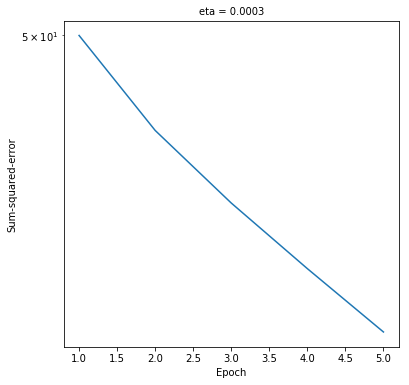

Eta chosen: 0.0003


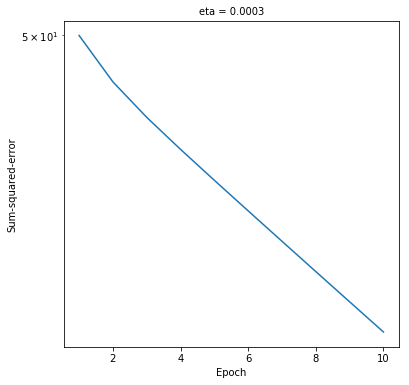

Eta chosen: 0.0003


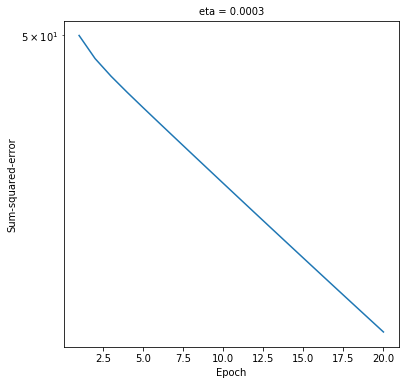

Eta chosen: 0.0003


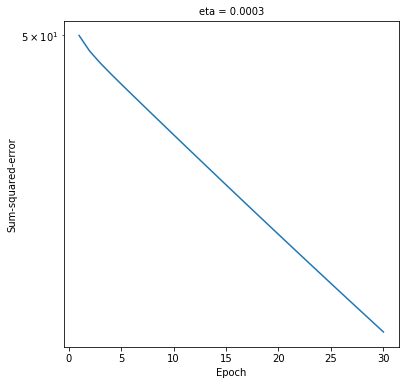

Eta chosen: 0.0003


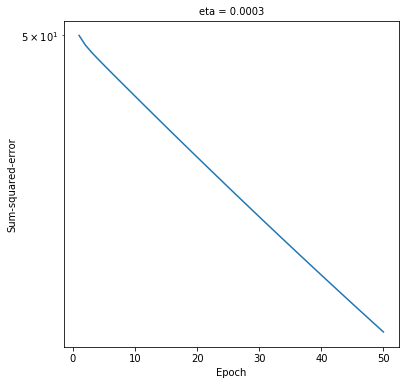

Eta chosen: 0.0003


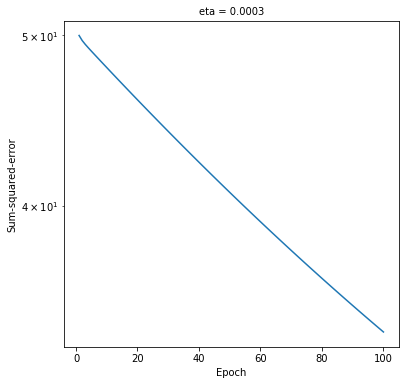

Eta chosen: 0.0003


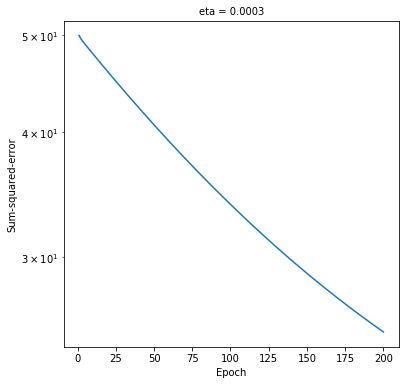

Eta chosen: 0.0003


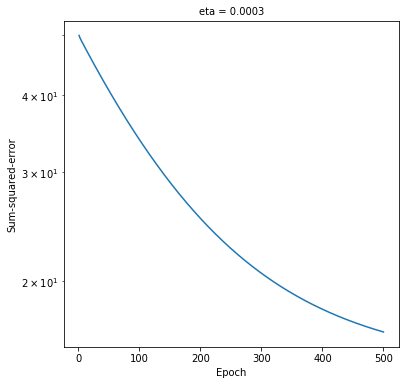

Eta chosen: 0.0003


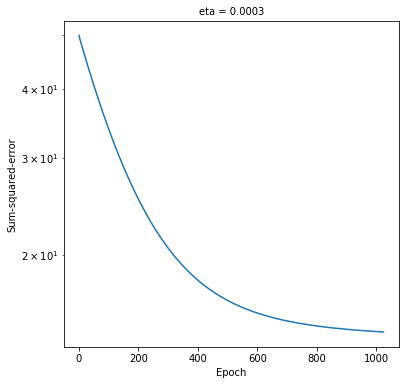

Eta chosen: 0.0003


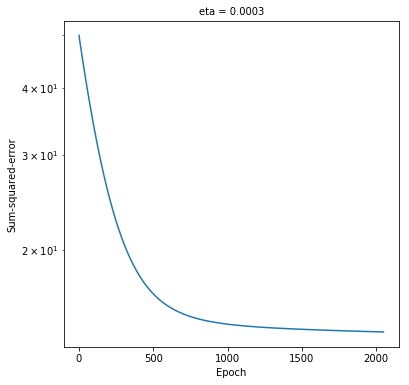

In [434]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [435]:
SSWPW_acc = ["%.2f" % elem for elem in test.accuracy_]
print("Case 8: Result of classfication using {} and {}and {}:".format(iris.feature_names[0],iris.feature_names[1],iris.feature_names[3]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 8: Result of classfication using sepal length (cm) and sepal width (cm)and petal width (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 48.982598942706765
Total Epochs: 10, Accuracy: 0.5, Final Cost: 47.93948236038646
Total Epochs: 20, Accuracy: 0.6799999999999999, Final Cost: 45.953489575695016
Total Epochs: 30, Accuracy: 0.85, Final Cost: 44.09043270032852
Total Epochs: 50, Accuracy: 0.89, Final Cost: 40.70226330170584
Total Epochs: 100, Accuracy: 0.92, Final Cost: 33.89272345681309
Total Epochs: 200, Accuracy: 0.92, Final Cost: 25.268936601899657
Total Epochs: 500, Accuracy: 0.92, Final Cost: 16.54288860206771
Total Epochs: 1024, Accuracy: 0.92, Final Cost: 14.501336483084128
Total Epochs: 2048, Accuracy: 0.94, Final Cost: 14.051542894258274


In [436]:
SPPW = X[:,(0,2,3)]
test = Test(SPPW,Y)

Eta chosen: 0.0003


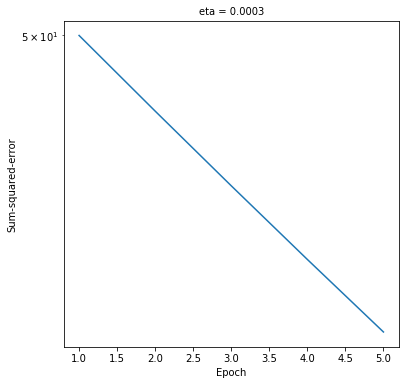

Eta chosen: 0.0003


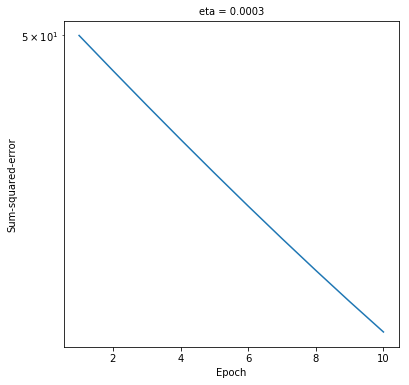

Eta chosen: 0.0003


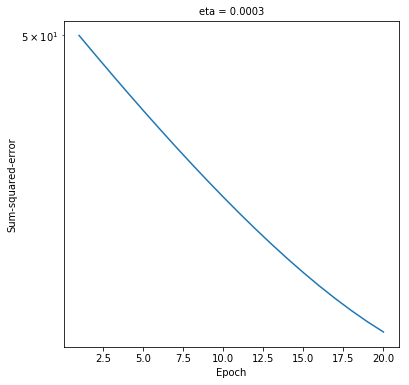

Eta chosen: 0.0003


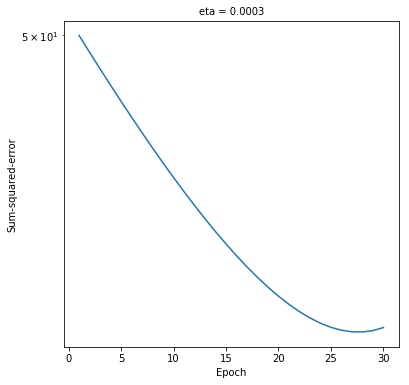

Eta chosen: 0.0001


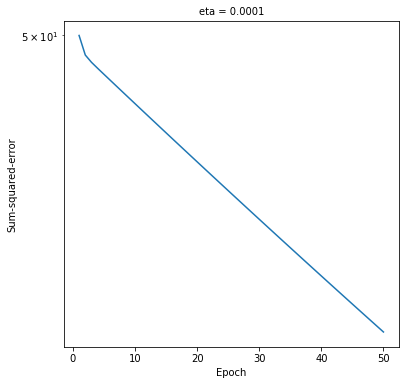

Eta chosen: 0.0001


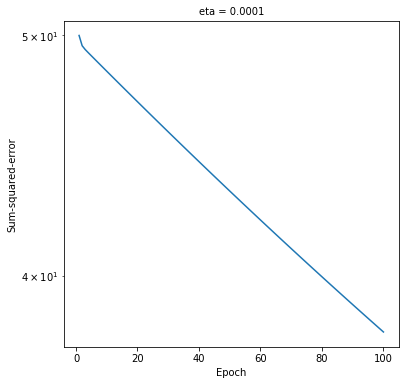

Eta chosen: 0.0001


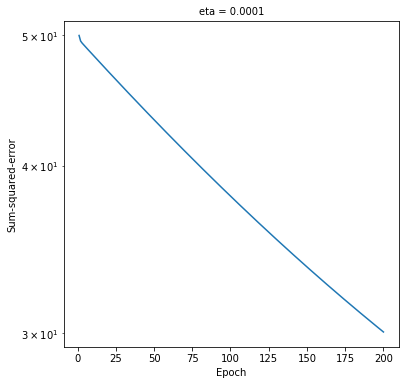

Eta chosen: 0.0001


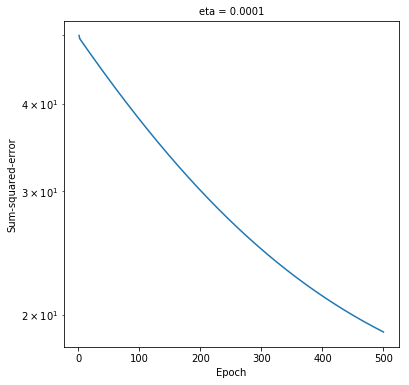

Eta chosen: 0.0001


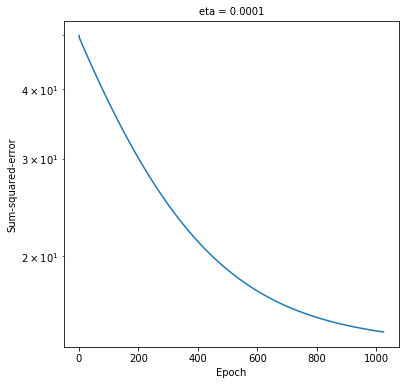

Eta chosen: 0.0001


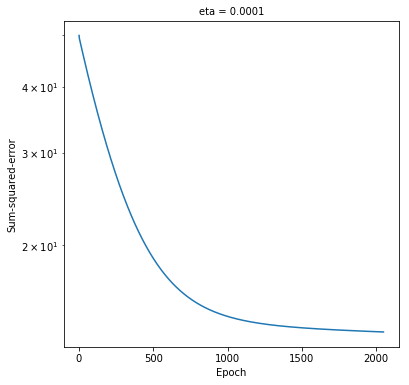

In [437]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [438]:
SPPW_acc = ["%.2f" % elem for elem in test.accuracy_]
print("Case 9: Result of classfication using {} and {}and {}:".format(iris.feature_names[0],iris.feature_names[2],iris.feature_names[3]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 9: Result of classfication using sepal length (cm) and petal length (cm)and petal width (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 48.47307324909597
Total Epochs: 10, Accuracy: 0.6799999999999999, Final Cost: 46.76586141906052
Total Epochs: 20, Accuracy: 0.5700000000000001, Final Cost: 44.22460927452192
Total Epochs: 30, Accuracy: 0.52, Final Cost: 43.57591226619065
Total Epochs: 50, Accuracy: 0.73, Final Cost: 43.2743642383707
Total Epochs: 100, Accuracy: 0.87, Final Cost: 37.96355200352665
Total Epochs: 200, Accuracy: 0.96, Final Cost: 30.075814953254802
Total Epochs: 500, Accuracy: 0.95, Final Cost: 18.909103706100858
Total Epochs: 1024, Accuracy: 0.95, Final Cost: 14.609842853888399
Total Epochs: 2048, Accuracy: 0.95, Final Cost: 13.713004453068969


In [439]:
SWPPW = X[:,(1,2,3)]
test = Test(SWPPW,Y)

Eta chosen: 0.0005


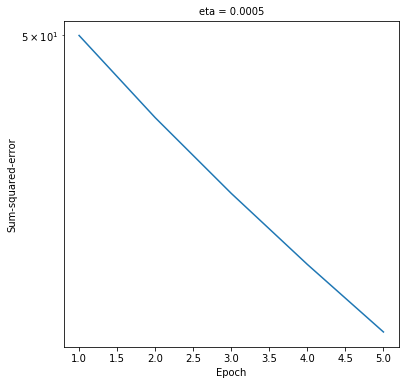

Eta chosen: 0.0005


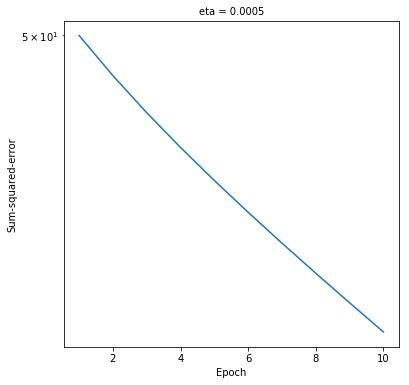

Eta chosen: 0.0005


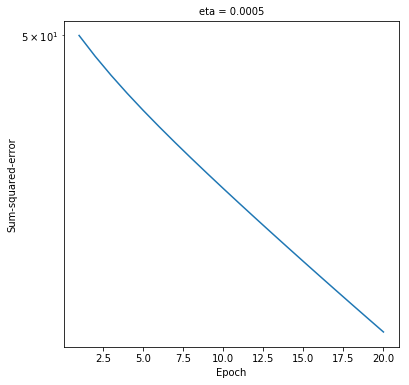

Eta chosen: 0.0005


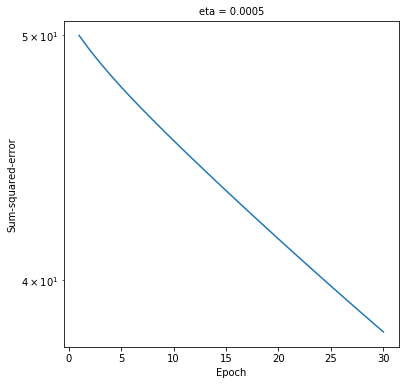

Eta chosen: 0.0005


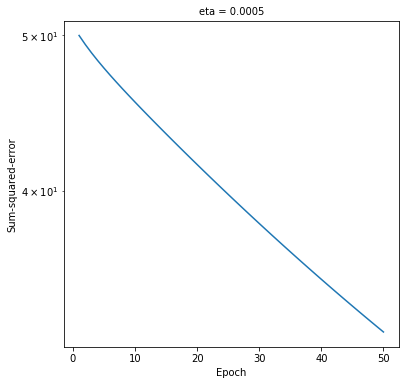

Eta chosen: 0.0005


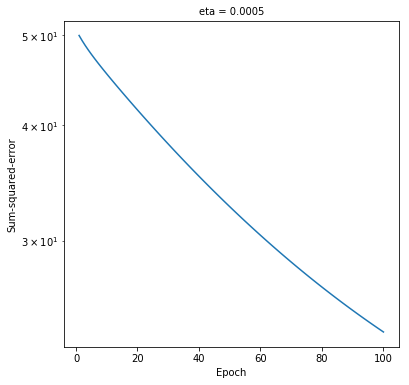

Eta chosen: 0.0005


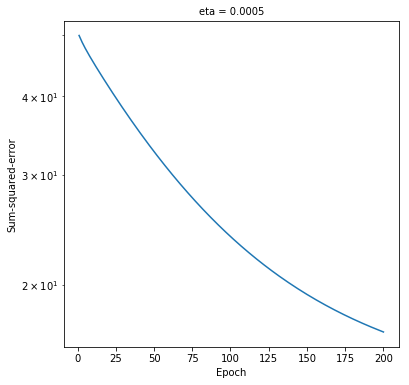

Eta chosen: 0.0005


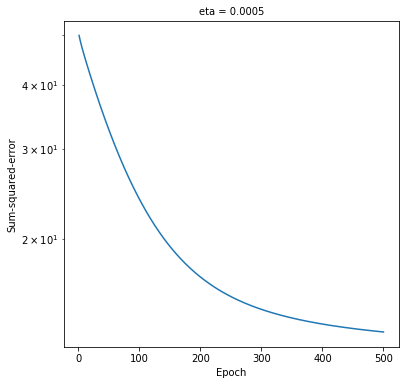

Eta chosen: 0.0005


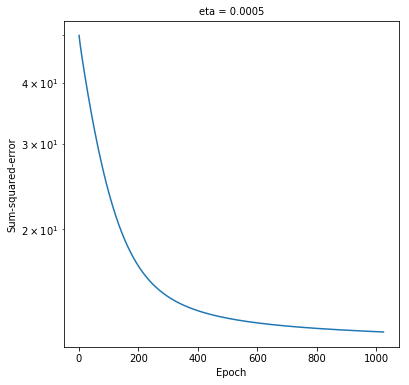

Eta chosen: 0.0005


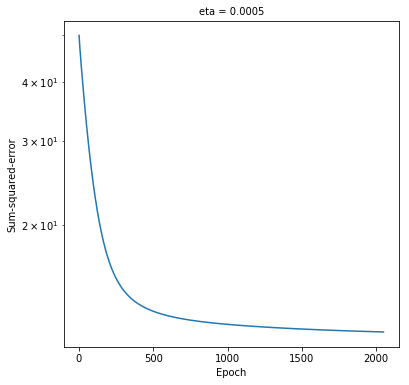

In [440]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [441]:
SWPPW_acc = ["%.2f" % elem for elem in test.accuracy_]
print("Case 10: Result of classfication using {} and {}and {}:".format(iris.feature_names[1],iris.feature_names[2],iris.feature_names[3]))
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 10: Result of classfication using sepal width (cm) and petal length (cm)and petal width (cm):
Total Epochs: 5, Accuracy: 0.5, Final Cost: 47.71235133769977
Total Epochs: 10, Accuracy: 0.5800000000000001, Final Cost: 45.43563654856519
Total Epochs: 20, Accuracy: 0.79, Final Cost: 41.53486205830224
Total Epochs: 30, Accuracy: 0.9, Final Cost: 38.15948734668112
Total Epochs: 50, Accuracy: 0.94, Final Cost: 32.64841851224387
Total Epochs: 100, Accuracy: 0.95, Final Cost: 23.8990585372764
Total Epochs: 200, Accuracy: 0.95, Final Cost: 16.833954077393173
Total Epochs: 500, Accuracy: 0.96, Final Cost: 13.143390598242618
Total Epochs: 1024, Accuracy: 0.96, Final Cost: 12.316903308224127
Total Epochs: 2048, Accuracy: 0.96, Final Cost: 11.889551234791933


In [442]:
ALL = X
test = Test(ALL,Y)

Eta chosen: 0.0001


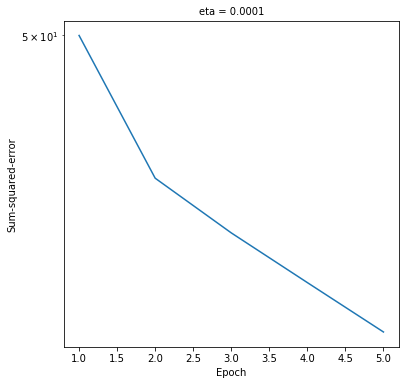

Eta chosen: 0.0001


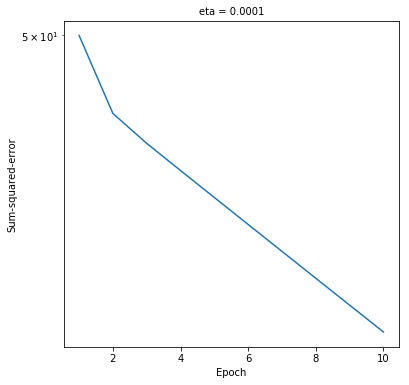

Eta chosen: 0.0001


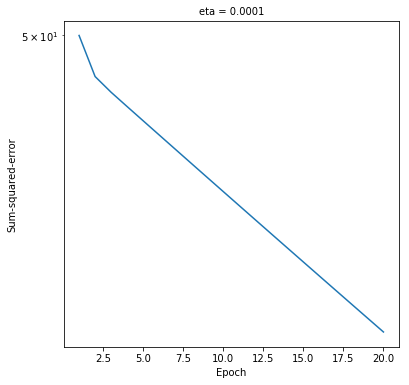

Eta chosen: 0.0001


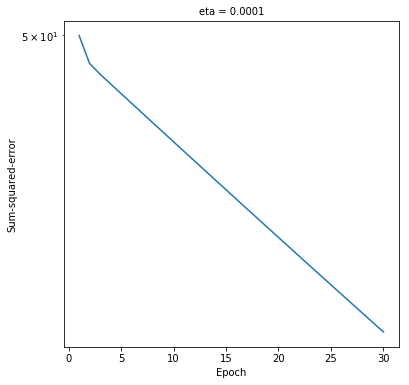

Eta chosen: 0.0001


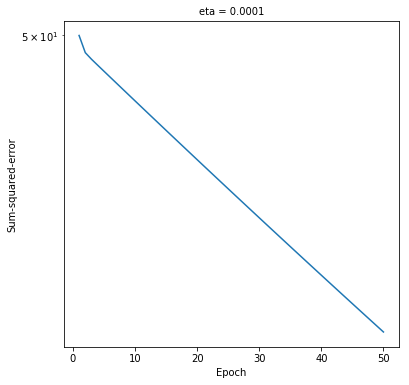

Eta chosen: 0.0001


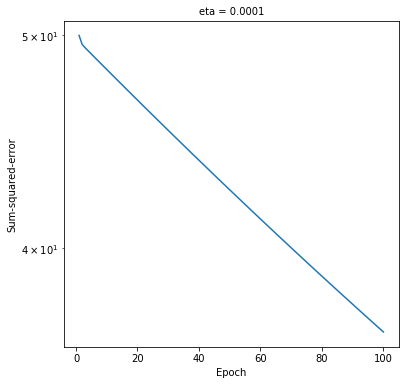

Eta chosen: 0.0001


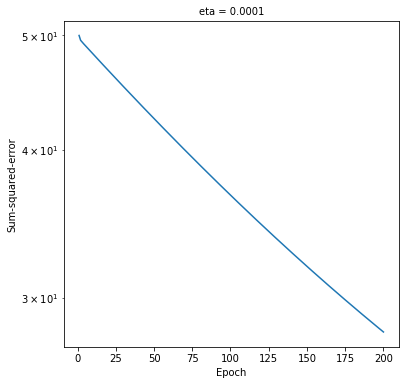

Eta chosen: 0.0001


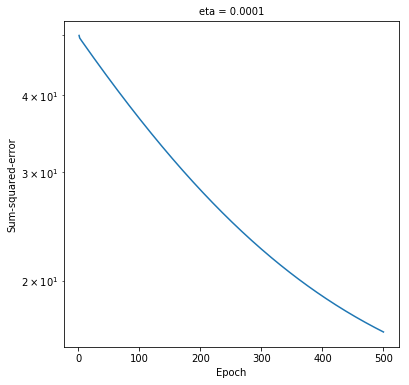

Eta chosen: 0.0001


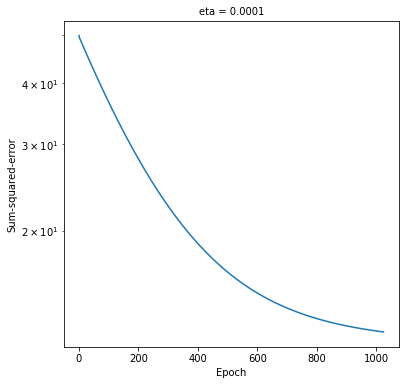

Eta chosen: 0.0001


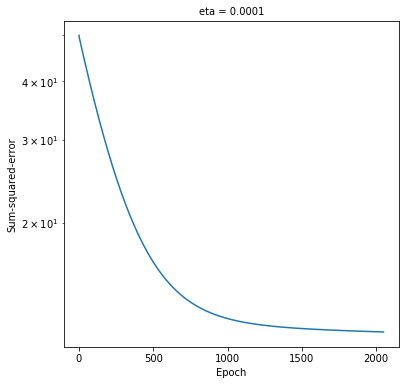

In [443]:
for epoch in epoch_selections:
    test.train(epoch_=epoch)

In [444]:
ALL_acc = ["%.2f" % elem for elem in test.accuracy_]
print("Case 10: Result of classfication using all four features")
i=0
for a,b in zip(test.accuracy_,test.cost):
    print("Total Epochs: {}, Accuracy: {}, Final Cost: {}".format(epoch_selections[i],a,b))
    i+=1

Case 10: Result of classfication using all four features
Total Epochs: 5, Accuracy: 0.5, Final Cost: 49.03400650400894
Total Epochs: 10, Accuracy: 0.5, Final Cost: 48.24671369219891
Total Epochs: 20, Accuracy: 0.52, Final Cost: 46.72230205431368
Total Epochs: 30, Accuracy: 0.64, Final Cost: 45.262410150517574
Total Epochs: 50, Accuracy: 0.79, Final Cost: 42.52534625024641
Total Epochs: 100, Accuracy: 0.92, Final Cost: 36.63370112886621
Total Epochs: 200, Accuracy: 0.96, Final Cost: 28.06040765473462
Total Epochs: 500, Accuracy: 0.96, Final Cost: 16.498644887573178
Total Epochs: 1024, Accuracy: 0.97, Final Cost: 12.458215558866387
Total Epochs: 2048, Accuracy: 0.97, Final Cost: 11.721373006270893


In [463]:
# Analysis 
"""
As what I expected, because I initialized the weights all to zeros rather than random small numbers each time and the fact
the dataset itself never changes, after serveral runs, I am certain that the result of each run would not change as there is 
nothing changing in each run.

So it will be safe to say that the following analysis can correctly describe the behaviour of the classification
of the Versicolor and Virginica iris using the Adaline model when all weights are set to 0 initailly(only when 
testing against the "TRAINING SET")

"""
# Below are the result table, the accuracy of each Adaline after numbers of epoch
# Note that S = sepal length, SW = sepal width, P = petal length, PW = petal width
# So SSW means using sepal length and sepal width
from IPython.display import HTML, display
data = [['Features Used','5 epochs','10 epochs','20 epochs','30 epochs','50 epochs','100 epochs','200 epochs','500 epochs','1024 epochs'
        ,'2048 epochs'],
        ["SSW"] + SSW_acc,
        ["SP"] + SP_acc,
        ["SPW"] + SPW_acc,
        ["SWP"] + SWP_acc,
        ["SWPW"] + SWPW_acc,
        ["PPW"] + PPW_acc,
        ["SSWP"] + SSWP_acc,
        ["SSWPW"] + SSWPW_acc,
        ["SPPW"] + SPPW_acc,
        ["SWPPW"] + SWPPW_acc,
        ["ALL"] + ALL_acc,
        ]
# Code from Stack Overflow https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

Features Used,5 epochs,10 epochs,20 epochs,30 epochs,50 epochs,100 epochs,200 epochs,500 epochs,1024 epochs,2048 epochs
SSW,0.50,0.50,0.50,0.50,0.50,0.57,0.60,0.68,0.70,0.73
SP,0.50,0.82,0.84,0.85,0.90,0.90,0.91,0.90,0.92,0.93
SPW,0.50,0.50,0.61,0.78,0.87,0.88,0.89,0.92,0.93,0.94
SWP,0.50,0.52,0.67,0.82,0.87,0.86,0.89,0.90,0.89,0.91
SWPW,0.52,0.80,0.91,0.92,0.91,0.92,0.92,0.94,0.94,0.95
PPW,0.50,0.50,0.50,0.57,0.65,0.84,0.91,0.94,0.94,0.94
SSWP,0.50,0.50,0.51,0.53,0.70,0.89,0.90,0.92,0.93,0.92
SSWPW,0.50,0.50,0.68,0.85,0.89,0.92,0.92,0.92,0.92,0.94
SPPW,0.50,0.68,0.57,0.52,0.73,0.87,0.96,0.95,0.95,0.95
SWPPW,0.50,0.58,0.79,0.90,0.94,0.95,0.95,0.96,0.96,0.96


In [468]:
"""
    A few points to point out
    1. In every Adaline, the accuracy of the model is increasing throughout the epochs, which means the training is indeed working
    
    2. By compare the different Adalines, in general, the more feature the adaline uses, the better the maximum accuracy
    (note that in all cases, versicolor and virginica are not linearly seperateble, so the accuracy never would reach 1.00)
    
    3. By visualizing the dataset, the harder to linearly seperate the dataset, the 'worst' the result, as Adaline method
    only draw a decision boundary for the classfication. (Sepal Length and Sepal Width are closely allied using the visualization
    function, makes it harder to classify using only one line)
    
    4. The rate in which the accuracy improving stops for some models, and the speed in which the accuracy improve is decreasing
     , this implies a best decision boundary has been drawn or we are reaching the best decision boundary limit(note that this is 
    only tested against the TRAINING SET, doesn't means this boundary would work well for new data)
    
    5. SSWP (Sepal length, Sepal width, Pedal length) behave very strange, from 1024 to 2048 epochs, the accuracy decreases, although 
    the total cost is indeed decreased. (Might have been costed by the accuracy fluctuating)
    SPPW also have a decrease at accuracy from 200 epochs to 500.
    
"""

"\n    A few points to point out\n    1. In every Adaline, the accuracy of the model is increasing throughout the epochs, which means the training is indeed working\n    \n    2. By compare the different Adalines, in general, the more feature the adaline uses, the better the maximum accuracy\n    (note that in all cases, versicolor and virginica are not linearly seperateble, so the accuracy never would reach 1.00)\n    \n    3. The rate in which the accuracy improving stops for some models, and are the speed in which the accuracy improve is decreasing\n     , this implies a best decision boundary has been drawn or we are reaching the best decision boundary limit(note that this is \n    only tested against the TRAINING SET, doesn't means this boundary would work well for new data)\n    \n    4. SSWP (Sepal length, Sepal width, Pedal length) behave very strange, from 1024 to 2048 epochs, the accuracy decreases, although \n    the total cost is indeed decreased. (Might have been costed by

Eta chosen: 0.0001


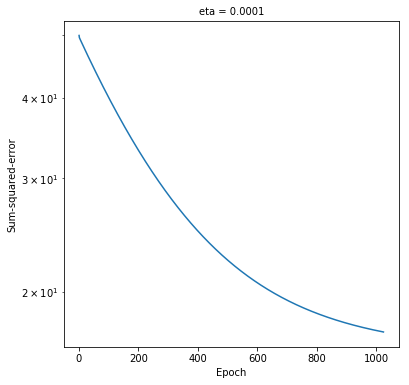

Eta chosen: 0.0001


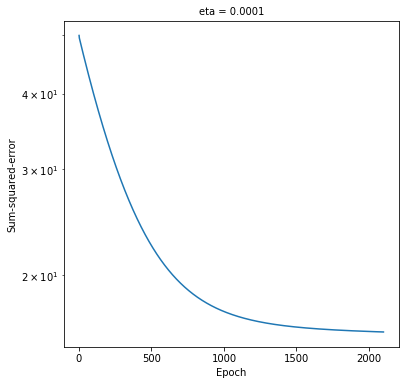

Eta chosen: 0.0001


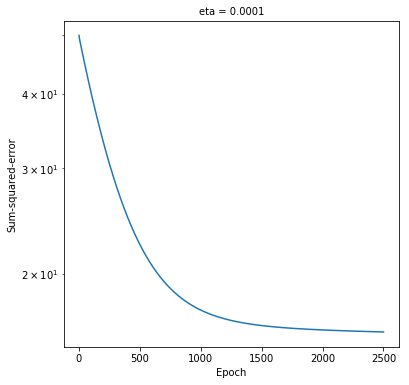

Eta chosen: 0.0001


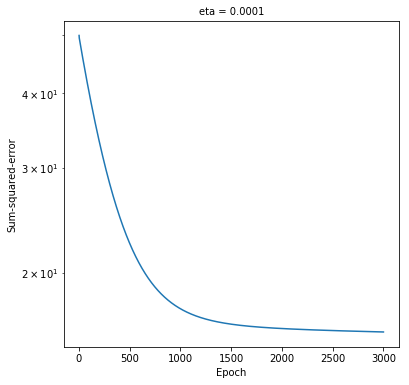

[0.9299999999999999, 0.92, 0.92, 0.92]
[17.320612334787576, 16.10135088201195, 16.00687966987021, 15.919775186380273]


In [14]:
# Test for SSWP for higher epochs
SSWP = X[:,(0,1,2)]
test = Test(SSWP,Y)
for i in [1024,2100,2500,3000]:
    test.train(epoch_ = i)
print(test.accuracy_)
print(test.cost)

In [ ]:
"""I could only guess that there is some rounding errors happening that caused this situation(cost did go down, but accuracy went down
0.93 to 0.92)"""

"""With all that being said, all of the conclusions has been drawn upon testing against the training set.
   Let say the Adaline that ran over 2000 epochs is used to classify a new set, we would never know if it will
   perform better than the 500 epochs version as we might have overfitting issues.
   
   Same with different features, there might been some test set that are better classified using 2 features than 4 features,
   (for example SWPW growing faster in accuracy than ALL features) before testing, we never know.
   
   This is the reason why large tech company always want more data from us, that those data could make the bot more 'clever',
   as even if your model is successful at another testing set, you can not be certain that testing set is not biased.
   Only if its tested against thousands if not millions of samples, we could conclude that a model is successful.
"""